Below we visualise the mobility time series calculated in the Notebook `MR_recalculate-Pgh-matrices` in the spatial COVID GitHub (private).

# Straight from the DataFrames

In [1]:
from covid19_DTM.visualization.output import *
import pandas as pd
import matplotlib.pyplot as plt

start_date = pd.Timestamp(2020, 1, 1)
end_date = pd.Timestamp(2022, 1, 1)

# hospitalisation_IN peaks, national (approx from 7-day average)
peak_first_wave = pd.Timestamp(2020, 3, 30)
peak_second_wave = pd.Timestamp(2020, 10, 31)
peak_third_wave = pd.Timestamp(2021, 3, 30)
peak_fourth_wave = pd.Timestamp(2021, 11, 29)

In [2]:
# Load and show resulting time series

NIS_from1 = 10000
NIS_to1 = '10000'

NIS_from2 = 10000
NIS_to2 = '21000'

t = start_date
dates = []
values1 = []
values2 = []
while t <= end_date:
    print(t.date(), end='\r')
    dates.append(t)
    try:
        matrix = pd.read_csv(f"../../../COVID19_spatial_private/interim/mobility/prov/fractional/new_P_data/newly-calculated-P-matrices_{t.strftime('%Y%m%d')}.csv", index_col='mllp_postalcode')
        value1 = 100*matrix.loc[NIS_from1, NIS_to1]
        value2 = 100*matrix.loc[NIS_from2, NIS_to2]
    except:
        value1 = None
        value2 = None
    values1.append(value1)
    values2.append(value2)
    t += pd.Timedelta(days=1)

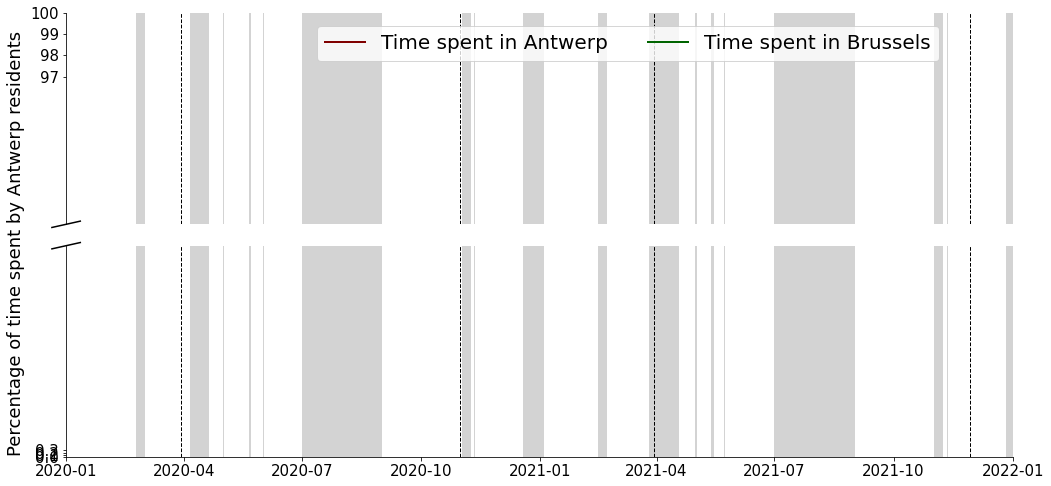

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

# Add mobility time series
axs[0].plot(dates, values1, linewidth=2, label='Time spent in Antwerp', color='maroon')
axs[1].plot(dates, values2, linewidth=2, label='Time spent in Brussels', color='darkgreen')

# Add background colouring
week_color='white'#'white'
weekend_color='white'#'lightgrey'
vacation_color='lightgrey'#weekend_color
color_timeframes(start_date, end_date, ax=axs[0], week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)
color_timeframes(start_date, end_date, ax=axs[1], week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)
# ax.set_title('test', size=14)

# Add vertical lines
color='k'
linestyle='--'
linewidth=1
for i in (0,1):
    axs[i].axvline(peak_first_wave, color=color, linestyle=linestyle, linewidth=linewidth)
    axs[i].axvline(peak_second_wave, color=color, linestyle=linestyle, linewidth=linewidth)
    axs[i].axvline(peak_third_wave, color=color, linestyle=linestyle, linewidth=linewidth)
    axs[i].axvline(peak_fourth_wave, color=color, linestyle=linestyle, linewidth=linewidth)
    
axs[0].set_ylim(90, 100)  # outliers only
axs[1].set_ylim(0, 10)

axs[0].set_yticks([97, 98, 99, 100])
axs[1].set_yticks([0, 0.1, 0.2, 0.3])

axs[0].set_xlim(start_date, end_date)
axs[1].set_xlim(start_date, end_date)

# axs[0].legend()
axs[0].grid(False)
axs[1].grid(False)

axs[0].get_xaxis().set_visible(False)
axs[0].spines['bottom'].set_visible(False)

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axs[0].transAxes, color='k', clip_on=False, linewidth=1.5)
axs[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# axs[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axs[1].transAxes)  # switch to the bottom axes
axs[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# axs[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Shared ylabel
fig.supylabel('Percentage of time spent by Antwerp residents', x=0.025)

# Shared legend
handles, labels = [(a + b) for a, b in zip(axs[0].get_legend_handles_labels(), axs[1].get_legend_handles_labels())]
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.6, 0.45, 0, 0.5), fontsize=20)

fig.tight_layout()

# plt.savefig('P-matrix_timeseries_11000-to-11000_11000-to-21000.png', dpi=400, bbox_inches='tight')

# With the added data, from TDPF

In [5]:
from covid19_DTM.visualization.output import *
import pandas as pd
import matplotlib.pyplot as plt

from covid19_DTM.data import mobility
from covid19_DTM.models.TDPF import make_mobility_update_function

start_date = pd.Timestamp(2020, 1, 1)
end_date = pd.Timestamp(2022, 1, 1)

In [6]:
proximus_mobility_data = mobility.get_proximus_mobility_data('prov')
mobility_function = make_mobility_update_function(proximus_mobility_data).mobility_wrapper_func

In [7]:
# Load and show resulting time series

NIS_from1 = 3 # 10000, Antwerp
NIS_to1 = 3 # 10000, Antwerp

NIS_from2 = 3 # 10000, Antwerp
NIS_to2 = -1 # 21000, Brussels

states = 0
param = 0

t = start_date
dates = []
values1 = []
values2 = []
while t <= end_date:
    dates.append(t)
    value1 = 100*mobility_function(t, states, param)[NIS_from1, NIS_to1]
    value2 = 100*mobility_function(t, states, param)[NIS_from2, NIS_to2]
    values1.append(value1)
    values2.append(value2)
    t += pd.Timedelta(days=1)

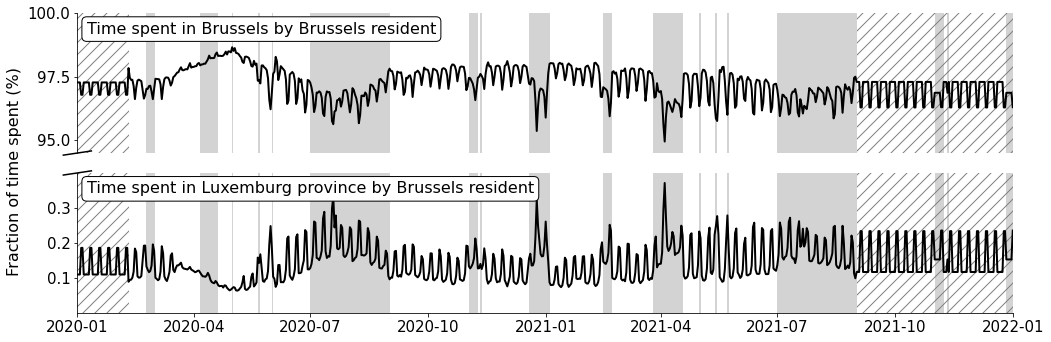

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

# Add mobility time series
axs[0].plot(dates, values1, linewidth=2, color='black')
axs[1].plot(dates, values2, linewidth=2, color='black')

# Add background colouring
week_color='white'#'white'
weekend_color='white'#'lightgrey'
vacation_color='lightgrey'#weekend_color
color_timeframes(start_date, end_date, ax=axs[0], week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)
color_timeframes(start_date, end_date, ax=axs[1], week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)
# ax.set_title('test', size=14)
    
axs[0].set_ylim(94.5, 100)  # outliers only
axs[1].set_ylim(0, .40)

axs[0].set_yticks([95, 97.5, 100])
axs[1].set_yticks([0.1, 0.2, 0.3])

axs[0].set_xlim(start_date, end_date)
axs[1].set_xlim(start_date, end_date)

# axs[0].legend()
axs[0].grid(False)
axs[1].grid(False)

axs[0].get_xaxis().set_visible(False)
axs[0].spines['bottom'].set_visible(False)

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axs[0].transAxes, color='k', clip_on=False, linewidth=1.5)
axs[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# axs[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axs[1].transAxes)  # switch to the bottom axes
axs[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# axs[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Shared ylabel
fig.supylabel('Fraction of time spent (%)', x=0.025, fontsize=16)

# Shared legend
#handles, labels = [(a + b) for a, b in zip(axs[0].get_legend_handles_labels(), axs[1].get_legend_handles_labels())]
#fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.0, 0, 0.5), fontsize=20)

# Add hatched regions
plt.rcParams['hatch.linewidth'] = 1
plt.rcParams['hatch.color'] = 'grey'
for i in [0,1]:
    axs[i].axvspan(pd.Timestamp(2019, 12, 31), pd.Timestamp(2020, 2, 10), hatch='//', alpha=0)
    axs[i].axvspan(pd.Timestamp(2021, 9, 1), pd.Timestamp(2022, 1, 1), hatch='//', alpha=0)

fig.tight_layout()

##############
## Text box ##
##############

titles = ['Time spent in Brussels by Brussels resident', 'Time spent in Luxemburg province by Brussels resident']   
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=1)

for i in range(2):
    # place a text box in upper left in axes coords
    axs[i].text(0.01, 0.94, titles[i], transform=axs[i].transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

plt.savefig('P-matrix_timeseries_21000-to-21000_21000-to-90000.png', dpi=600, bbox_inches='tight')
plt.savefig('P-matrix_timeseries_21000-to-21000_21000-to-90000.pdf', bbox_inches='tight')